# importing

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime


from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")

# CO2 concentration

In [2]:
co2_concentration_df = pd.read_csv('data/co2_concentration.csv')

In [3]:
co2_concentration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datenum           24180 non-null  int64  
 1   year              24180 non-null  int64  
 2   month             24180 non-null  int64  
 3   day               24180 non-null  int64  
 4   datetime          24180 non-null  object 
 5   data_mean_global  24180 non-null  float64
 6   data_mean_nh      24180 non-null  float64
 7   data_mean_sh      24180 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


In [4]:
co2_concentration_df.describe()

,datenum,year,month,day,data_mean_global,data_mean_nh,data_mean_sh
count,24180.000000,24180.000000,24180.000000,24180.0,24180.000000,24180.000000,24180.000000
mean,367981.278908,1007.000000,6.500000,15.0,282.609005,282.649649,282.568361
std,212458.753155,581.692353,3.452124,0.0,13.293774,13.697621,13.018358
min,15.000000,0.000000,1.000000,15.0,273.830262,271.497654,276.028855
25%,183997.500000,503.000000,3.750000,15.0,278.019756,277.614363,278.058685
50%,367980.000000,1007.000000,6.500000,15.0,279.807560,280.284309,279.414571
75%,551962.750000,1511.000000,9.250000,15.0,281.964426,282.660256,281.791037
max,735948.000000,2014.000000,12.000000,15.0,399.179692,403.127557,396.164296


In [5]:
co2_concentration_df.dtypes

datenum               int64
year                  int64
month                 int64
day                   int64
datetime             object
data_mean_global    float64
data_mean_nh        float64
data_mean_sh        float64
dtype: object

In [6]:
co2_concentration_df.head(3)

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
0,15,0,1,15,15-Jan-0000 00:00:00,278.366439,279.045659,277.687219
1,46,0,2,15,15-Feb-0000 00:00:00,278.713058,279.665398,277.760718
2,75,0,3,15,15-Mar-0000 00:00:00,279.013835,280.266779,277.760892


### missing data

In [7]:
co2_concentration_df.isnull().sum()

datenum             0
year                0
month               0
day                 0
datetime            0
data_mean_global    0
data_mean_nh        0
data_mean_sh        0
dtype: int64

In [8]:
co2_concentration_df.isnull().mean()

datenum             0.0
year                0.0
month               0.0
day                 0.0
datetime            0.0
data_mean_global    0.0
data_mean_nh        0.0
data_mean_sh        0.0
dtype: float64

In [9]:
co2_concentration_df['datetime'] = pd.to_datetime(co2_concentration_df['datetime'], errors = 'coerce', format='%d-%b-%Y %H:%M:%S')

In [10]:
co2_data = co2_concentration_df.iloc[:, [1, -1,-2,-3]]

In [11]:
co2_data = co2_data[co2_data['year'] >= 1750]

In [12]:
co2_data.set_index('year', inplace=True)

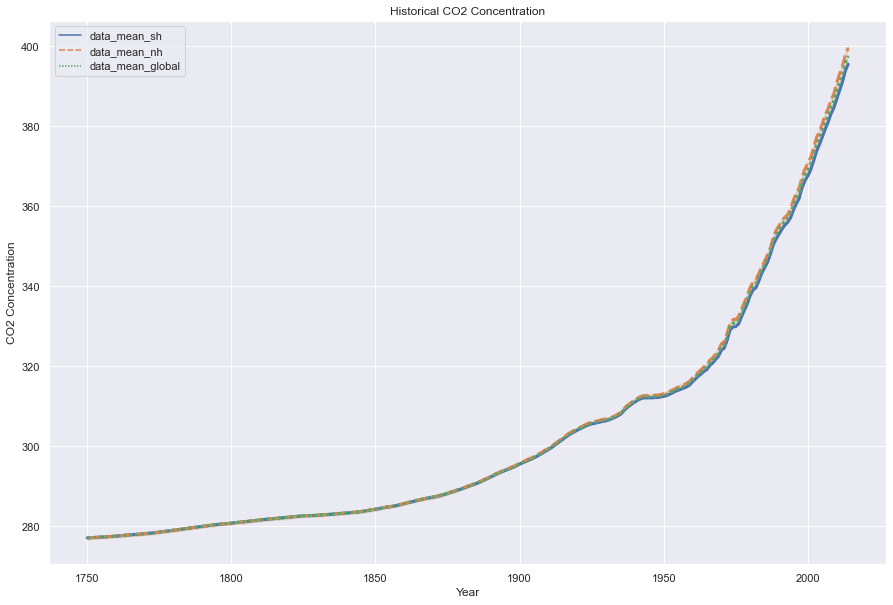

In [13]:
plt.subplots(figsize=(15,10))

plt.title('Historical CO2 Concentration')

ax = sns.lineplot(data=co2_data,ci=40, lw=3)

ax.set(xlabel='Year', ylabel='CO2 Concentration')

plt.savefig('co2_historical.pdf')

plt.show()

## autocorr

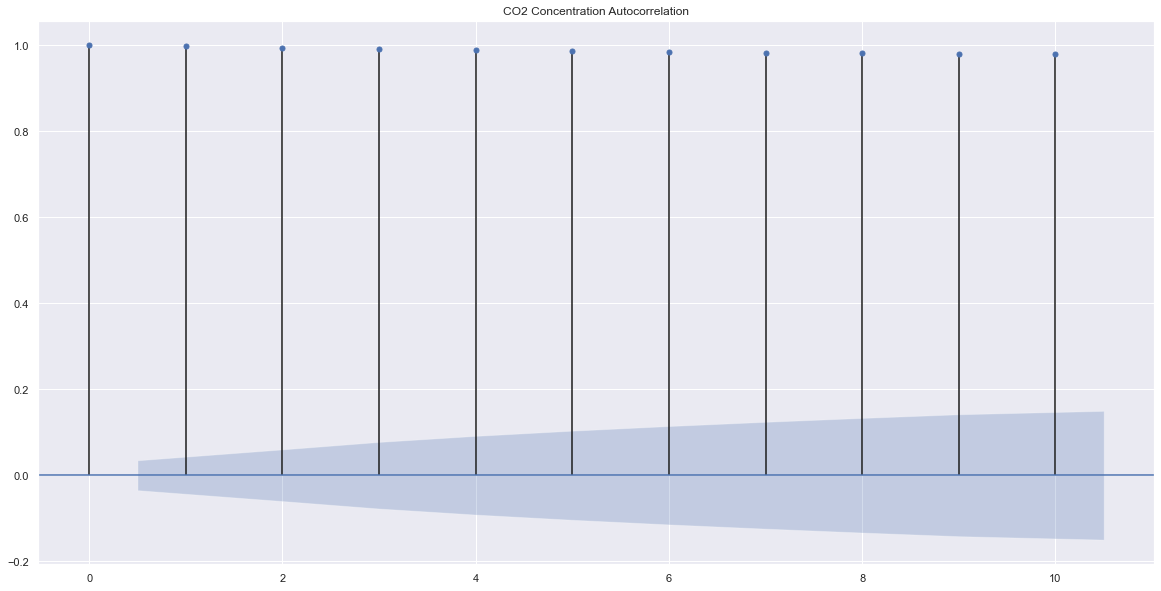

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_acf(co2_data['data_mean_global'], ax, title='CO2 Concentration Autocorrelation', lags=10)

plt.savefig('co2_autocorr.pdf')

plt.show()

## decomposing time series

In [15]:
co2_concentration_df = co2_concentration_df[co2_concentration_df['datetime'].notnull()]

In [16]:
co2_concentration_df.set_index('datetime', inplace=True)

In [17]:
co2_concentration_df.index

DatetimeIndex(['1677-10-15', '1677-11-15', '1677-12-15', '1678-01-15',
               '1678-02-15', '1678-03-15', '1678-04-15', '1678-05-15',
               '1678-06-15', '1678-07-15',
               ...
               '2014-03-15', '2014-04-15', '2014-05-15', '2014-06-15',
               '2014-07-15', '2014-08-15', '2014-09-15', '2014-10-15',
               '2014-11-15', '2014-12-15'],
              dtype='datetime64[ns]', name='datetime', length=4047, freq=None)

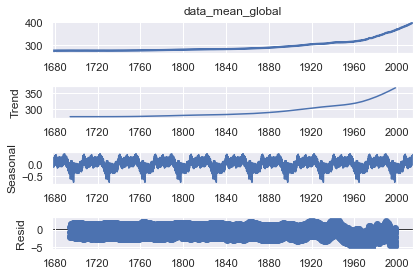

In [18]:
s_decomp = seasonal_decompose(co2_concentration_df['data_mean_global'], model='additive', period=400)
s_decomp.plot()
plt.show()

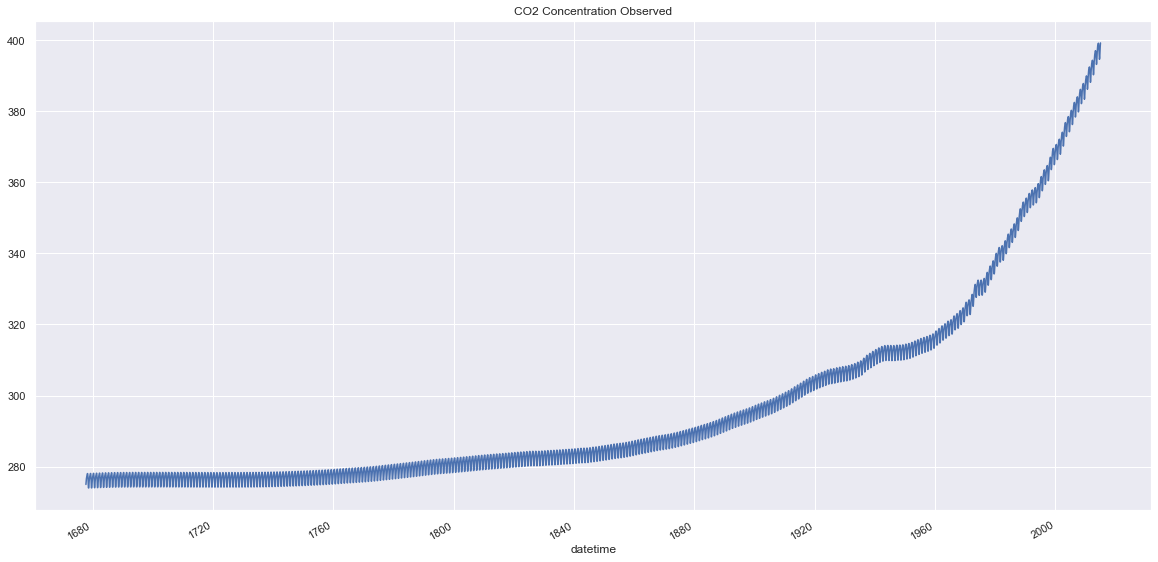

In [19]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Observed')

plt.savefig('co2_decomp_observed.pdf')


s_decomp.observed.plot()
plt.show()

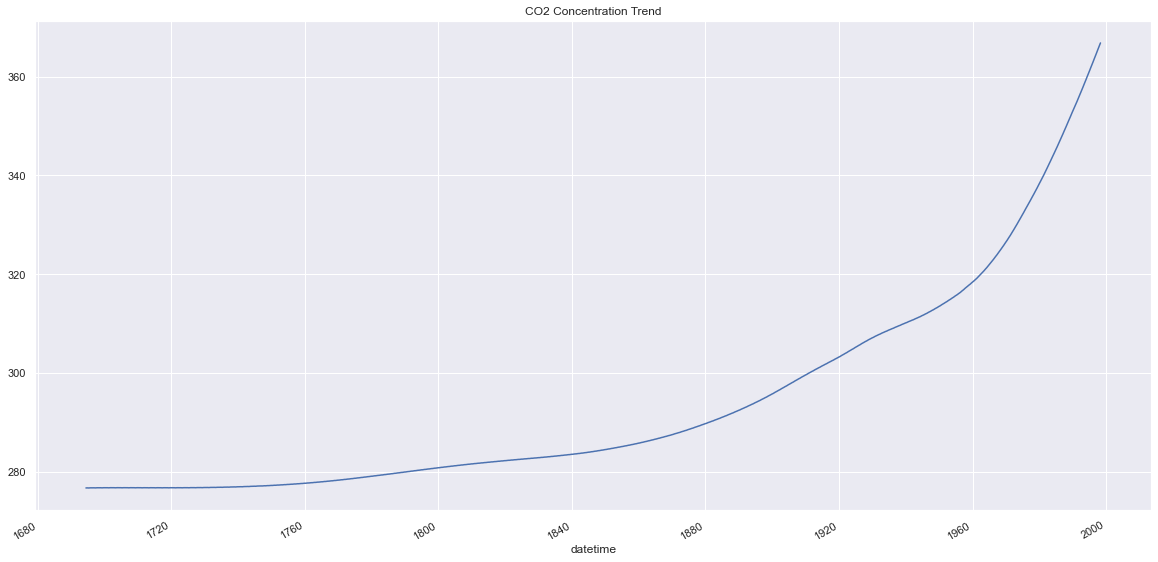

In [20]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Trend')

plt.savefig('co2_decomp_trend.pdf')

s_decomp.trend.plot()
plt.show()

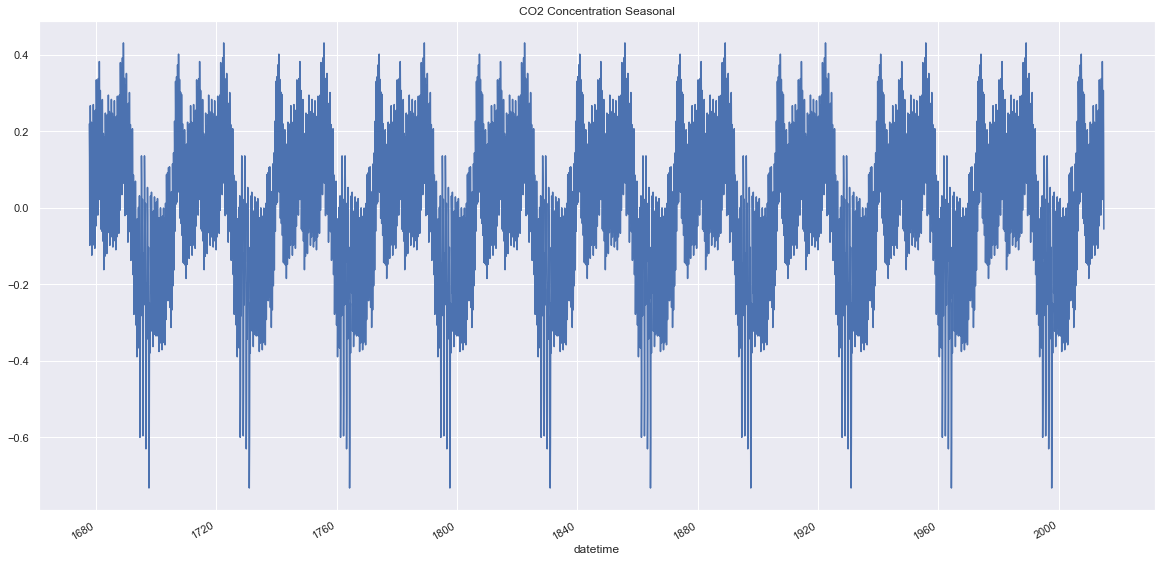

In [21]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Seasonal')

plt.savefig('co2_decomp_season.pdf')

s_decomp.seasonal.plot()
plt.show()

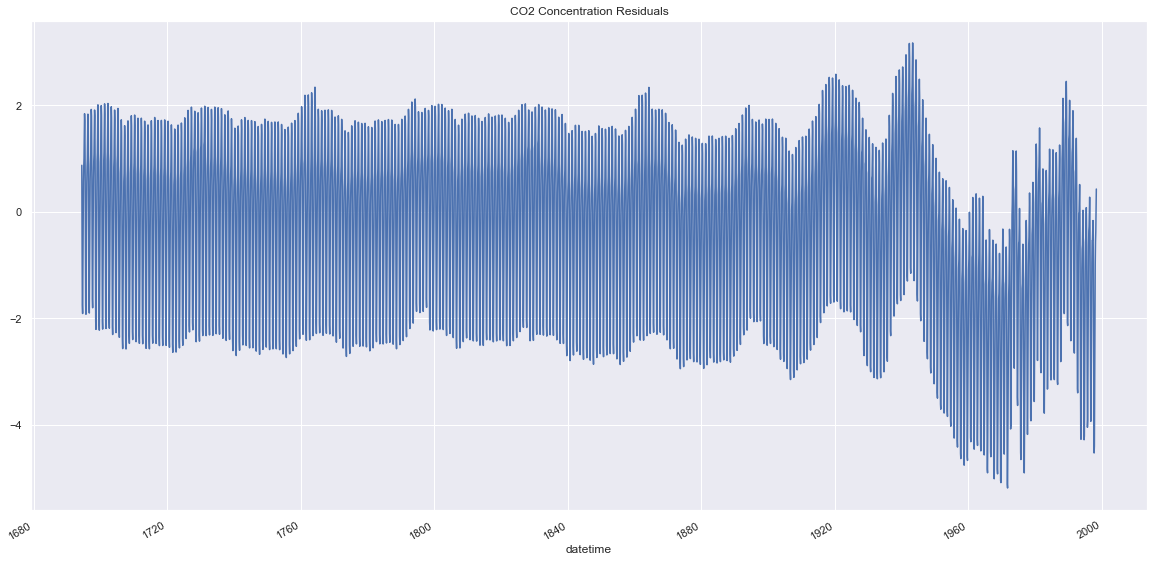

In [22]:
plt.subplots(figsize=(20,10))
plt.title('CO2 Concentration Residuals')

plt.savefig('co2_decomp_resid.pdf')


s_decomp.resid.plot()
plt.show()

## stationarity